In [3]:
import os
import numpy as np
from skimage import io
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
# Load the dataset
def load_data(path):
    folders = os.listdir(path)
    x = []
    y = []
    for i, folder in enumerate(folders):
        files = os.listdir(os.path.join(path, folder))
        for file in files:
            img = io.imread(os.path.join(path, folder, file))
            if img is not None:
                x.append(img)
                y.append(i)
    x = np.array(x)
    y = np.array(y)
    return x, y

path = '/content/drive/MyDrive/EuroTest'
x, y = load_data(path)

In [8]:
img_size = (64, 64)
# Normalize the pixel values
x = x / 255.0

In [9]:
model = load_model('/content/best_model.h5')

In [15]:
# Predict classes for the sample images
y_pred = np.argmax(model.predict(x), axis=-1)

1/1 [==============================] - 0s 104ms/step


In [19]:
loss, acc = model.evaluate(x, y, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', acc)

Test Loss: 18.628860473632812
Test Accuracy: 0.10000000149011612


In [20]:
# Map class labels to names
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
y_pred_names = [class_names[i] for i in y_pred]

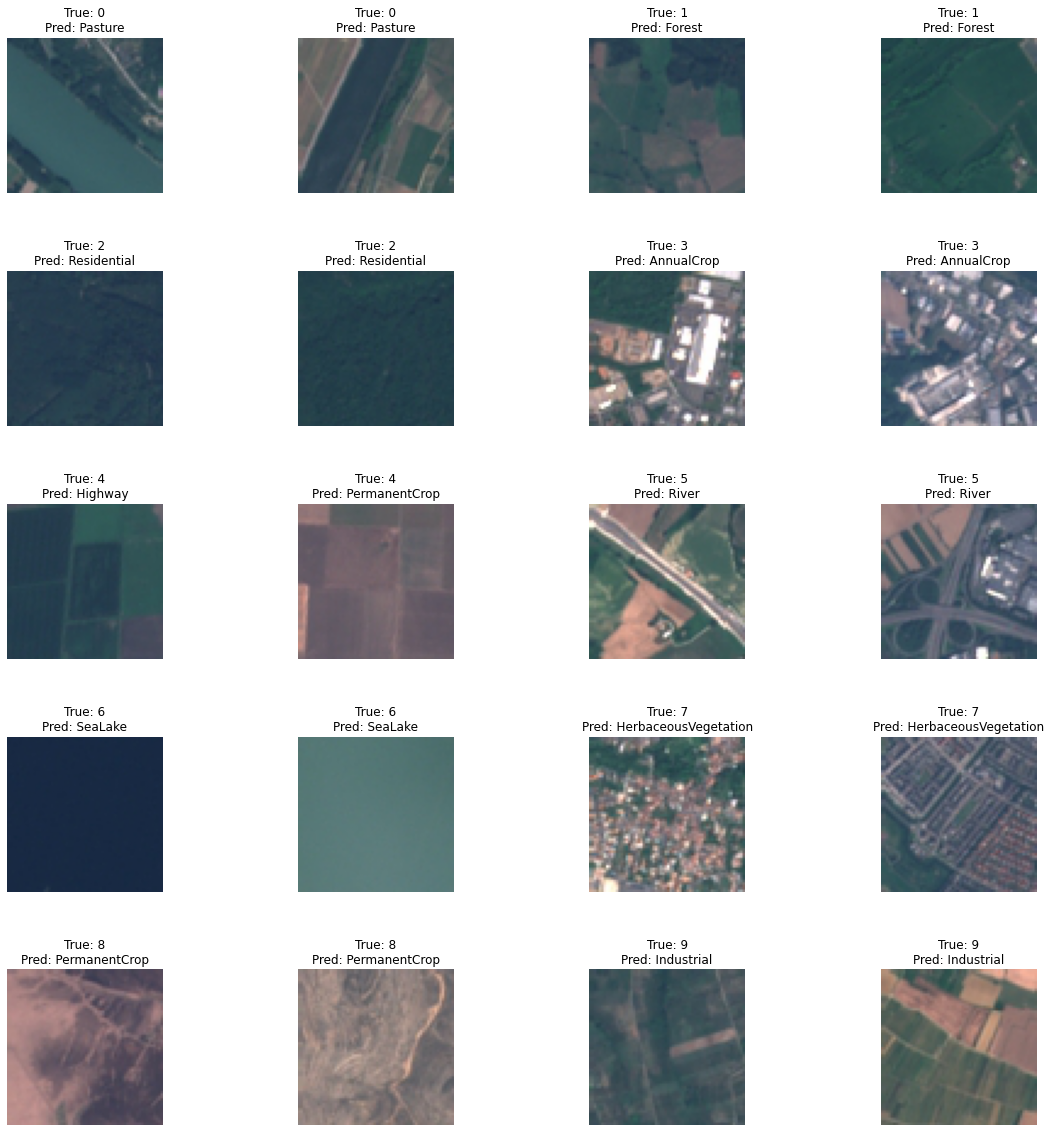

In [22]:
fig, axes = plt.subplots(5, 4, figsize=(20,20))
axes = axes.ravel()
for i in range(len(x)):
  if i >= len(axes):
    break
  axes[i].imshow(x[i])
  axes[i].set_title('True: {}\nPred: {}'.format(y[i], y_pred_names[i]))
  axes[i].axis('off')
  plt.subplots_adjust(hspace=0.5)
plt.show()